In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
r=pd.read_csv('Raw_Data_Singapore Credit Dataset.csv')

In [4]:
r

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
0,< 0 SGD,6,critical,furniture/appliances,1169,unknown,> 7 years,4,4,67,none,own,2,skilled,1,yes,no
1,1 - 200 SGD,48,good,furniture/appliances,5951,< 100 SGD,1 - 4 years,2,2,22,none,own,1,skilled,1,no,yes
2,unknown,12,critical,education,2096,< 100 SGD,4 - 7 years,2,3,49,none,own,1,unskilled,2,no,no
3,< 0 SGD,42,good,furniture/appliances,7882,< 100 SGD,4 - 7 years,2,4,45,none,other,1,skilled,2,no,no
4,< 0 SGD,24,poor,car,4870,< 100 SGD,1 - 4 years,3,4,53,none,other,2,skilled,2,no,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,unknown,12,good,furniture/appliances,1736,< 100 SGD,4 - 7 years,3,4,31,none,own,1,unskilled,1,no,no
996,< 0 SGD,30,good,car,3857,< 100 SGD,1 - 4 years,4,4,40,none,own,1,management,1,yes,no
997,unknown,12,good,furniture/appliances,804,< 100 SGD,> 7 years,4,4,38,none,own,1,skilled,1,no,no
998,< 0 SGD,45,good,furniture/appliances,1845,< 100 SGD,1 - 4 years,4,4,23,none,other,1,skilled,1,yes,yes


In [5]:
r.shape

(1000, 17)

CHECKING NULL VALUES

In [6]:
r.isnull()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [7]:
r.isnull().sum()

checking_balance        0
months_loan_duration    0
credit_history          0
purpose                 0
amount                  0
savings_balance         0
employment_duration     0
percent_of_income       0
years_at_residence      0
age                     0
other_credit            0
housing                 0
existing_loans_count    0
job                     0
dependents              0
phone                   0
default                 0
dtype: int64

THERE ARE NO NULL VALUES

In [8]:
r['checking_balance'].unique()

array(['< 0 SGD', '1 - 200 SGD', 'unknown', '> 200 SGD'], dtype=object)

In [9]:
r['checking_balance'].replace({'< 0 SGD':0, '1 - 200 SGD':1, 'unknown':2 , '> 200 SGD':3},inplace=True)

In [10]:
r['credit_history'].unique()

array(['critical', 'good', 'poor', 'perfect', 'very good'], dtype=object)

In [11]:
r['credit_history'].replace({'critical':0, 'good':1, 'poor':2 , 'perfect':3,'very good':4},inplace=True)

In [12]:
r['purpose'].unique()

array(['furniture/appliances', 'education', 'car', 'business',
       'renovations', 'car0'], dtype=object)

In [13]:
r['purpose'].replace({'furniture/appliances':0, 'education':1, 'car':2 , 'business':3, 'renovations':4 ,'car0':5},inplace=True)

In [14]:
r['savings_balance'].unique()

array(['unknown', '< 100 SGD', '500 - 1000 SGD', '> 1000 SGD',
       '100 - 500 SGD'], dtype=object)

In [15]:
r['savings_balance'].replace({'unknown':0, '< 100 SGD':1, '500 - 1000 SGD':2 , '> 1000 SGD':3, '100 - 500 SGD':4},inplace=True)

In [16]:
r['employment_duration'].unique()

array(['> 7 years', '1 - 4 years', '4 - 7 years', 'unemployed',
       '< 1 year'], dtype=object)

In [17]:
r['employment_duration'].replace({'> 7 years':0, '1 - 4 years':1, '4 - 7 years':2 , 'unemployed':3, '< 1 year':4},inplace=True)

In [18]:
r['other_credit'].unique()

array(['none', 'bank', 'store'], dtype=object)

In [19]:
r['other_credit'].replace({'none':0, 'bank':1, 'store':2 },inplace=True)

In [20]:
r['housing'].unique()

array(['own', 'other', 'rent'], dtype=object)

In [21]:
r['housing'].replace({'own':0, 'other':1, 'rent':2 },inplace=True)

In [22]:
r['job'].unique()

array(['skilled', 'unskilled', 'management', 'unemployed'], dtype=object)

In [23]:
r['job'].replace({'skilled':0, 'unskilled':1, 'management':2,'unemployed':3},inplace=True)

In [24]:
r['phone'].unique()

array(['yes', 'no'], dtype=object)

In [25]:
r['phone'].replace({'yes':0, 'no':1},inplace=True)

In [26]:
r['default'].unique()

array(['no', 'yes'], dtype=object)

In [27]:
r['default'].replace({'yes':0, 'no':1},inplace=True)

In [28]:
r

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
0,0,6,0,0,1169,0,0,4,4,67,0,0,2,0,1,0,1
1,1,48,1,0,5951,1,1,2,2,22,0,0,1,0,1,1,0
2,2,12,0,1,2096,1,2,2,3,49,0,0,1,1,2,1,1
3,0,42,1,0,7882,1,2,2,4,45,0,1,1,0,2,1,1
4,0,24,2,2,4870,1,1,3,4,53,0,1,2,0,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2,12,1,0,1736,1,2,3,4,31,0,0,1,1,1,1,1
996,0,30,1,2,3857,1,1,4,4,40,0,0,1,2,1,0,1
997,2,12,1,0,804,1,0,4,4,38,0,0,1,0,1,1,1
998,0,45,1,0,1845,1,1,4,4,23,0,1,1,0,1,0,0


In [29]:
r.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   checking_balance      1000 non-null   int64
 1   months_loan_duration  1000 non-null   int64
 2   credit_history        1000 non-null   int64
 3   purpose               1000 non-null   int64
 4   amount                1000 non-null   int64
 5   savings_balance       1000 non-null   int64
 6   employment_duration   1000 non-null   int64
 7   percent_of_income     1000 non-null   int64
 8   years_at_residence    1000 non-null   int64
 9   age                   1000 non-null   int64
 10  other_credit          1000 non-null   int64
 11  housing               1000 non-null   int64
 12  existing_loans_count  1000 non-null   int64
 13  job                   1000 non-null   int64
 14  dependents            1000 non-null   int64
 15  phone                 1000 non-null   int64
 16  default

In [30]:
r.describe()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,1.246000,20.903000,1.022000,1.17200,3271.258000,1.285000,1.561000,2.973000,2.845000,35.546000,0.233000,0.466000,1.407000,0.562000,1.155000,0.596000,0.700000
std,0.927547,12.058814,0.991211,1.24899,2822.736876,1.133605,1.382096,1.118715,1.103718,11.375469,0.522479,0.779392,0.577654,0.821481,0.362086,0.490943,0.458487
min,0.000000,4.000000,0.000000,0.00000,250.000000,0.000000,0.000000,1.000000,1.000000,19.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
25%,0.000000,12.000000,0.000000,0.00000,1365.500000,1.000000,0.000000,2.000000,2.000000,27.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
50%,1.000000,18.000000,1.000000,1.00000,2319.500000,1.000000,1.000000,3.000000,3.000000,33.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000
75%,2.000000,24.000000,1.000000,2.00000,3972.250000,1.000000,2.000000,4.000000,4.000000,42.000000,0.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000
max,3.000000,72.000000,4.000000,5.00000,18424.000000,4.000000,4.000000,4.000000,4.000000,75.000000,2.000000,2.000000,4.000000,3.000000,2.000000,1.000000,1.000000


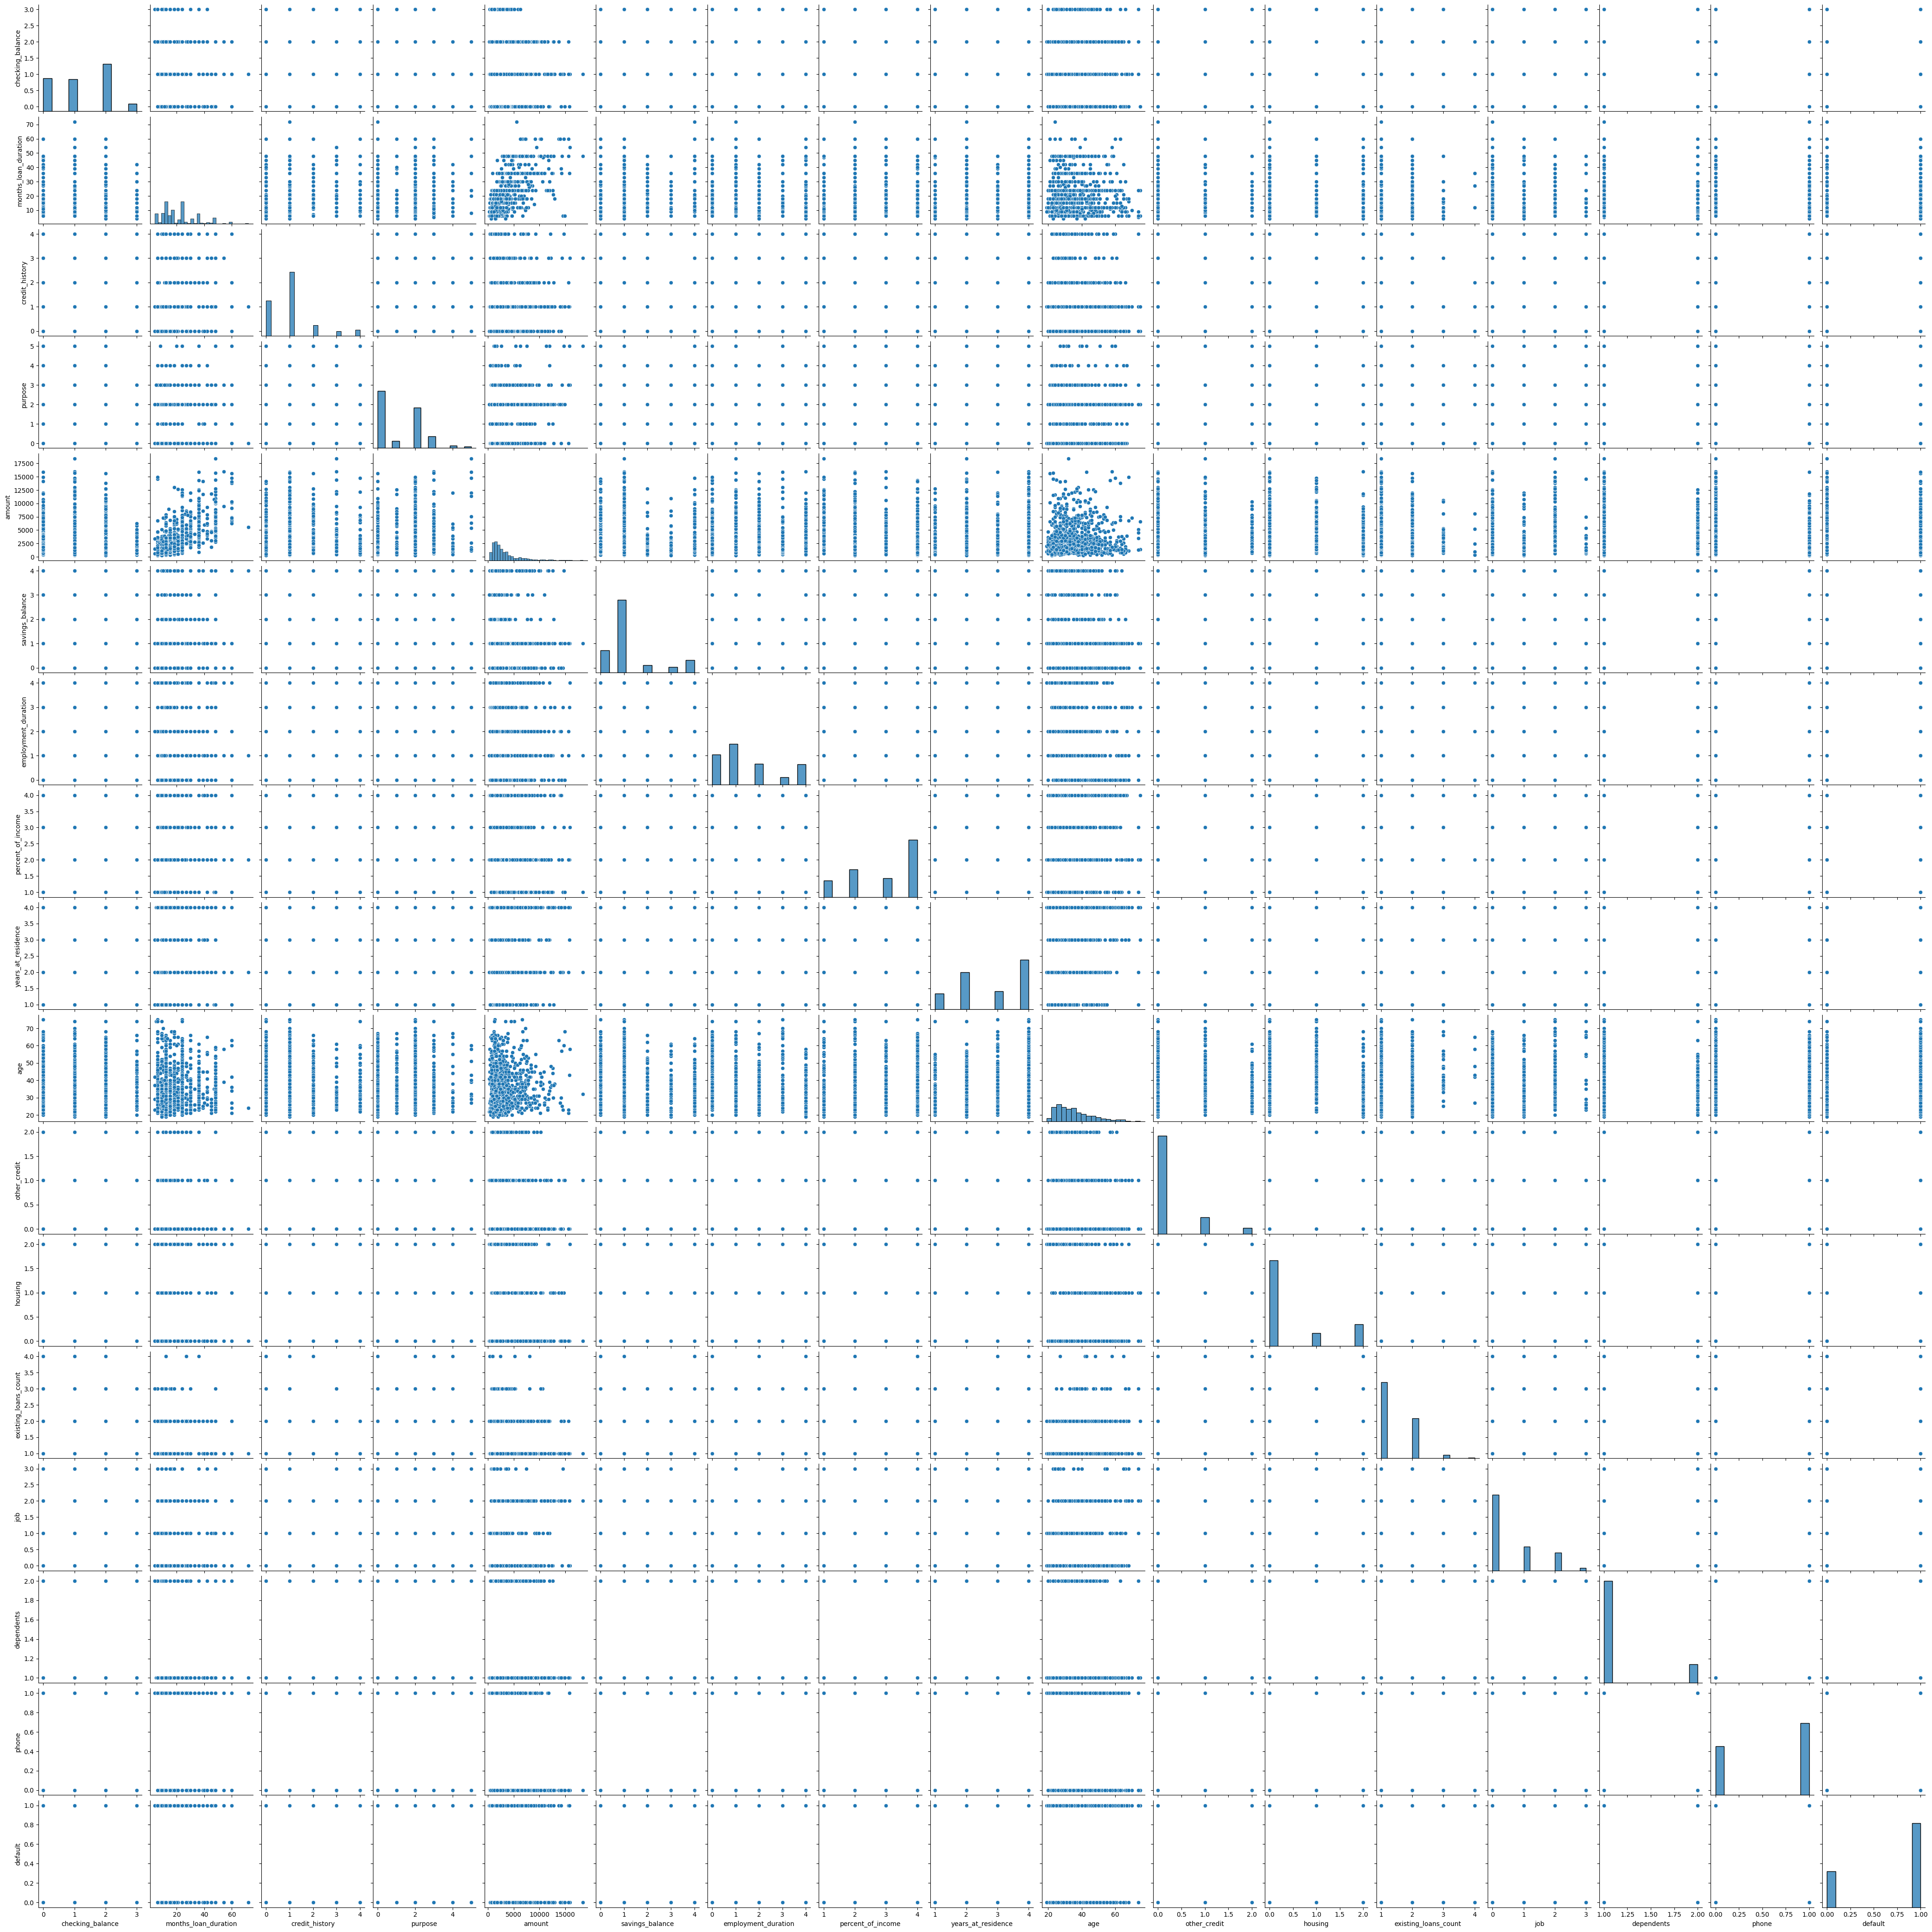

In [31]:
sns.pairplot(r)
plt.show()

In [32]:
x=r.iloc[:,:-1].values
y=r.iloc[:,-1].values
x

array([[ 0,  6,  0, ...,  0,  1,  0],
       [ 1, 48,  1, ...,  0,  1,  1],
       [ 2, 12,  0, ...,  1,  2,  1],
       ...,
       [ 2, 12,  1, ...,  0,  1,  1],
       [ 0, 45,  1, ...,  0,  1,  0],
       [ 1, 45,  0, ...,  0,  1,  1]], dtype=int64)

In [33]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [34]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(800, 16) (200, 16) (800,) (200,)


In [35]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression(max_iter=1000)
classifier.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

In [36]:
y_pred=classifier.predict(x_test)
y_pred

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1], dtype=int64)

In [37]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [38]:
confusion_matrix(y_test,y_pred)

array([[ 26,  32],
       [ 24, 118]], dtype=int64)

In [39]:
accuracy_score(y_test,y_pred)

0.72